In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained ResNet50 model without top (fully connected) layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of ResNet50
model = Model(inputs=base_model.input, outputs=base_model.output)

# Specify folder paths for emotion of child face image sets
angry_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
fear_folder_path = '/Users/isurudissanayake/Desktop/ASD/Fear'
joy_folder_path = '/Users/isurudissanayake/Desktop/ASD/Happy'
# natural_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
sadness_folder_path = '/Users/isurudissanayake/Desktop/ASD/Sad'
# surprise_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'

# Extract features for angry child faces
angry_features = extract_features(model, angry_folder_path)

# Extract features for fear child faces
fear_features = extract_features(model, fear_folder_path)

# Extract features for joy child faces
joy_features = extract_features(model, joy_folder_path)

# Extract features for natural child faces
# natural_features = extract_features(model, natural_folder_path)

# Extract features for sadness child faces
sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
# surprise_features = extract_features(model, surprise_folder_path)

# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Anger/Anger.npy', angry_features)
np.save('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Fear/Fear.npy', fear_features)
np.save('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Haapy/Happy.npy', joy_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
np.save('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Sad/Sad.npy', sadness_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)


94668760/94668760 [==============================] - 55s 1us/step


2024-03-24 13:03:42.836052: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 47ms/step


/Users/isurudissanayake/Desktop/Tensorflow/env/lib/python3.10/site-packages/keras/preprocessing/image.py:2092: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1027, 7, 7, 2048) (2048 channels).
  warnings.warn(
/Users/isurudissanayake/Desktop/Tensorflow/env/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1027, 7, 7, 2048) (2048 channels).
  warnings.warn(


Epoch 1/100


2024-03-27 17:52:47.978742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 19s 568ms/step - loss: 12.1835 - accuracy: 0.5881 - val_loss: 1.2652 - val_accuracy: 0.7732
Epoch 2/100
32/32 [==============================] - 18s 564ms/step - loss: 1.0410 - accuracy: 0.7011 - val_loss: 0.7417 - val_accuracy: 0.7687
Epoch 3/100
32/32 [==============================] - 18s 565ms/step - loss: 0.8534 - accuracy: 0.7342 - val_loss: 0.7063 - val_accuracy: 0.7687
Epoch 4/100
32/32 [==============================] - 18s 566ms/step - loss: 0.8209 - accuracy: 0.7429 - val_loss: 0.6641 - val_accuracy: 0.7687
Epoch 5/100
32/32 [==============================] - 18s 571ms/step - loss: 0.7712 - accuracy: 0.7420 - val_loss: 0.6915 - val_accuracy: 0.7732
Epoch 6/100
32/32 [==============================] - 18s 574ms/step - loss: 0.7835 - accuracy: 0.7468 - val_loss: 0.6722 - val_accuracy: 0.7687
Epoch 7/100
32/32 [==============================] - 18s 571ms/step - loss: 0.7619 - accuracy: 0.7449 - val_loss: 0.6231 - val_accuracy: 0.7642
Epo

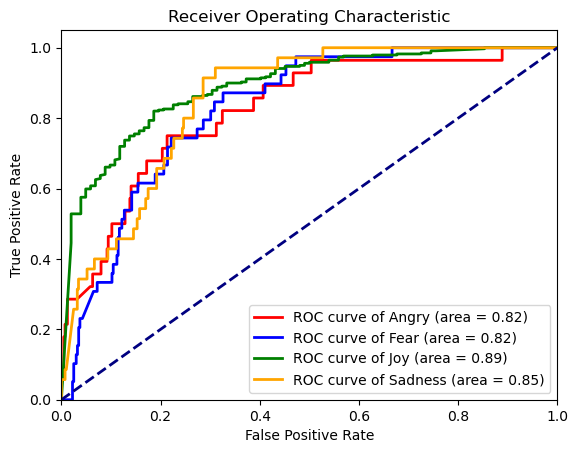

Root Mean Squared Error (RMSE): 0.6529194857524804
Mean Absolute Error (MAE): 0.2857142857142857


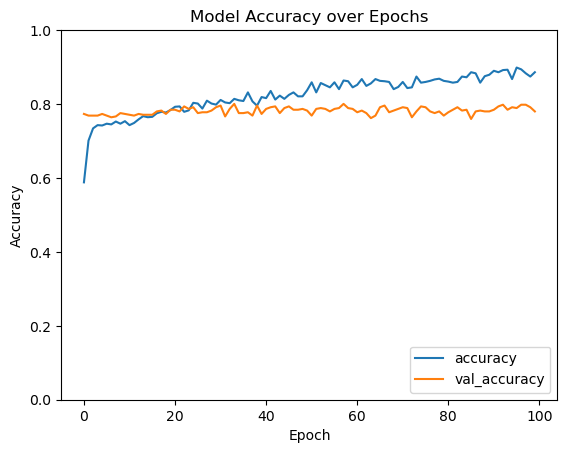

In [2]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the extracted features for emotions
angry_features = np.load('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Anger/Anger.npy')
fear_features = np.load('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Fear/Fear.npy')
joy_features = np.load('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Haapy/Happy.npy')
sadness_features = np.load('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/Sad/Sad.npy')

# Assign labels
angry_labels = np.ones(angry_features.shape[0]) * 0
fear_labels = np.ones(fear_features.shape[0]) * 1
joy_labels = np.ones(joy_features.shape[0]) * 2
sadness_labels = np.ones(sadness_features.shape[0]) * 3

# Combine features and labels
X = np.vstack([angry_features, fear_features, joy_features, sadness_features])
y = np.concatenate([angry_labels, fear_labels, joy_labels, sadness_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Model definition
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 emotions

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100,
                    validation_data=(X_test, y_test))

# Save the trained model
model.save('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_names = ['Angry', 'Fear', 'Joy', 'Sadness']
report = classification_report(y_test, y_pred_classes, target_names=class_names, zero_division=0)
print("Classification Report:")
print(report)

# ROC Curve and AUC (only applicable for binary or multi-class classification)
if len(class_names) > 1:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    colors = ['red', 'blue', 'green', 'orange']
    for i, color in zip(range(len(class_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

# Load the trained model
model = load_model('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Load the VGG16 model without the top classification layers
resnet50V2 = ResNet50V2(weights='imagenet', include_top=False)

# Define a function to preprocess input image and extract features
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    # Reshape the features to match the expected input shape of (None, 14, 14, 512)
    features = np.reshape(features, (features.shape[0], 7, 7, 2048))

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, model, resnet50V2)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)


1/1 [==============================] - 0s 85ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.0, 'Fear': 0.0, 'Joy': 100.0, 'Sad': 0.0}


In [4]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained VGG16 model without top (fully connected) layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.output)

asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'
non_asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD'

# # Specify folder paths for emotion of child face image sets
# angry_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
# fear_folder_path = '/Users/isurudissanayake/Desktop/ASD/Fear'
# joy_folder_path = '/Users/isurudissanayake/Desktop/ASD/Happy'
# # natural_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'
# sadness_folder_path = '/Users/isurudissanayake/Desktop/ASD/Sad'
# # surprise_folder_path = '/Users/isurudissanayake/Desktop/ASD/Anger'

asd_features = extract_features(model, asd_folder_path)
non_asd_features = extract_features(model, non_asd_folder_path)
# Extract features for angry child faces
# angry_features = extract_features(model, angry_folder_path)
# 
# # Extract features for fear child faces
# fear_features = extract_features(model, fear_folder_path)
# 
# # Extract features for joy child faces
# joy_features = extract_features(model, joy_folder_path)
# 
# # Extract features for natural child faces
# # natural_features = extract_features(model, natural_folder_path)
# 
# # Extract features for sadness child faces
# sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
# surprise_features = extract_features(model, surprise_folder_path)

np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/asd_features.npy', asd_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/non_asd_features.npy', non_asd_features)
# Save the extracted features for later use in training
# np.save('/Users/isurudissanayake/Desktop/FASD/Anger/Anger.npy', angry_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Fear/Fear.npy', fear_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Haapy/Happy.npy', joy_features)
# # np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
# np.save('/Users/isurudissanayake/Desktop/FASD/Sad/Sad.npy', sadness_features)
# np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)


1/1 [==============================] - 0s 91ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/child-1617.png: cannot identify image file <_io.BytesIO object at 0x169f17c20>
1/1 [==============================] - 0s 107ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/additional1178.png: cannot identify image file <_io.BytesIO object at 0x16c14ae50>
1/1 [==============================] - 0s 85ms/step


Epoch 1/100
175/175 [==============================] - 15s 86ms/step - loss: 1.3144 - accuracy: 0.8697 - val_loss: 0.2333 - val_accuracy: 0.9184
Epoch 2/100
175/175 [==============================] - 14s 81ms/step - loss: 0.2335 - accuracy: 0.9094 - val_loss: 0.2283 - val_accuracy: 0.9134
Epoch 3/100
175/175 [==============================] - 14s 82ms/step - loss: 0.1833 - accuracy: 0.9288 - val_loss: 0.2338 - val_accuracy: 0.9306
Epoch 4/100
175/175 [==============================] - 14s 82ms/step - loss: 0.1318 - accuracy: 0.9438 - val_loss: 0.2427 - val_accuracy: 0.9341
Epoch 5/100
175/175 [==============================] - 15s 82ms/step - loss: 0.0999 - accuracy: 0.9567 - val_loss: 0.3232 - val_accuracy: 0.9184
Epoch 6/100
175/175 [==============================] - 14s 82ms/step - loss: 0.1016 - accuracy: 0.9620 - val_loss: 0.2540 - val_accuracy: 0.9270
Epoch 7/100
175/175 [==============================] - 15s 83ms/step - loss: 0.0887 - accuracy: 0.9646 - val_loss: 0.2593 - val_ac

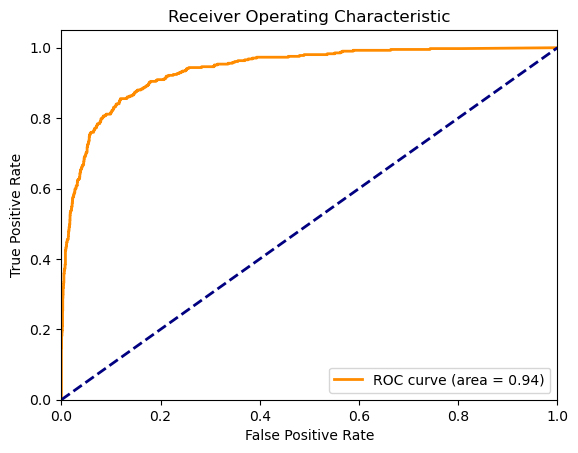

Root Mean Squared Error (RMSE): 0.28780606548390414
Mean Absolute Error (MAE): 0.08283233132932531


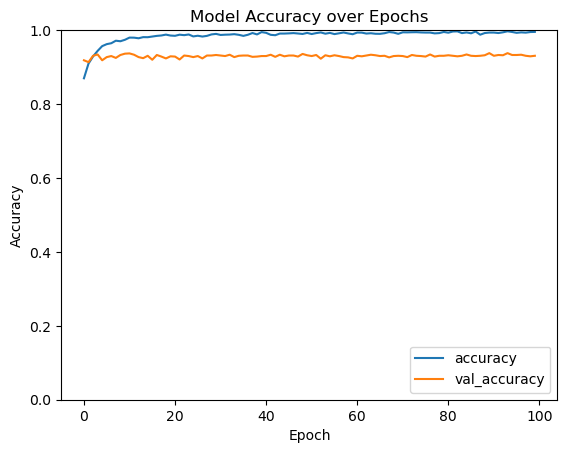

In [5]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the extracted features
asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/asd_features.npy')
non_asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/non_asd_features.npy')

# Create labels for the features
asd_labels = np.ones(asd_features.shape[0])
non_asd_labels = np.zeros(non_asd_features.shape[0])

# Concatenate features and labels
X = np.vstack([asd_features, non_asd_features])
y = np.concatenate([asd_labels, non_asd_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(7, 7, 2048)))  # Adjust input shape to match the flattened features
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()

# Calculate training time
elapsed_time = end_time - start_time
print("Model training time:", elapsed_time, "seconds")

# Save the trained model
model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50Model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
target_names = ['Non-ASD', 'ASD']
report = classification_report(y_test, y_pred_classes, target_names=target_names)
print("Classification Report:")
print(report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_classes, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_classes)
print("Mean Absolute Error (MAE):", mae)

# Learning Curve
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2

from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Load the VGG16 model without the top classification layers
resnet50V2 = ResNet50V2(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
resnet50V2_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50Model.h5')

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, resnet50V2)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, resnet50V2_model, resnet50V2)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

1/1 [==============================] - 0s 62ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 99.96, 'Fear': 100.0, 'Joy': 100.0, 'Sad': 100.0}
1/1 [==============================] - 0s 59ms/step
Predicted ASD Label: ASD
ASD Percentage: 98.68


2024-03-27 22:10:24.301670: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 161ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.0, 'Fear': 0.0, 'Joy': 100.0, 'Sad': 0.0}
1/1 [==============================] - 0s 68ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 403ms/step


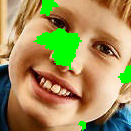

Predicted ASD Label: ASD
ASD Percentage: 97.42


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2

from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Load the VGG16 model without the top classification layers
resnet50V2 = ResNet50V2(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
resnet50V2_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50Model.h5')

# Load the pre-trained ResNet50 model
base_model = ResNet50V2(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(255, activation='relu')(x)
x = Reshape((1, 1, 255))(x) # Add this line to reshape the output of GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

lime_model = Model(inputs=base_model.input, outputs=prediction)

resnet50V2_img_scaled = None
target_size = (224, 224)
# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global resnet50V2_img_scaled

    limeImg = cv2.imread(input_image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    resnet50V2_img_scaled = limeImg / 255
    
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global resnet50V2_img_scaled
    
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:

        explainer = LimeImageExplainer()

        # Generate an explanation for the prediction using the explainer object
        explanation = explainer.explain_instance(resnet50V2_img_scaled[0], lime_model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

        # Visualize the explanation using matplotlib
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

        # Resize the explanation mask to match the original image dimensions
        mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

        # Resize the explanation mask to 100x100
        mask = cv2.resize(mask, (100, 100), interpolation=cv2.INTER_NEAREST)

        # Convert the mask to the original image mode
        original_image = Image.open(input_image_path)
        original_width, original_height = original_image.size
        original_mode = original_image.mode

        # Overlay the explanation mask on the original image
        mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        original_image = np.array(original_image)
        original_image[mask > 0.5] = (0, 255, 0)

        # Display the original image with the explanation mask
        display(Image.fromarray(original_image))
        
        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, resnet50V2)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, resnet50V2_model, resnet50V2)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

1/1 [==============================] - 0s 58ms/step
Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.0, 'Fear': 0.0, 'Joy': 100.0, 'Sad': 0.0}
1/1 [==============================] - 0s 54ms/step


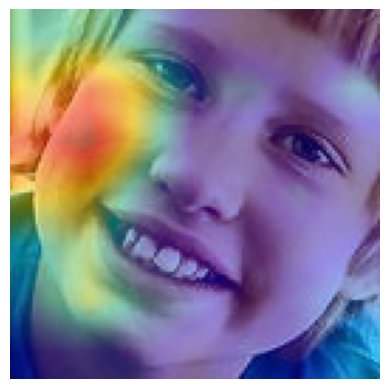

Predicted ASD Label: ASD
ASD Percentage: 97.42


In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2

from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Load the VGG16 model without the top classification layers
resnet50V2 = ResNet50V2(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
resnet50V2_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50Model.h5')

# Load the pre-trained ResNet50 model
base_model = ResNet50V2(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(255, activation='relu')(x)
x = Reshape((1, 1, 255))(x) # Add this line to reshape the output of GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

resnet50V2model = Model(inputs=base_model.input, outputs=prediction)

target_size = (224, 224)

resnet50V2_img_scaled = None
resnet50_grad_img_original = None
resnet50_grad_img_for_model = None
resnet50_grad_img_scaled = None

def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global resnet50V2_img_scaled
    global resnet50_grad_img_original 
    global resnet50_grad_img_for_model
    global resnet50_grad_img_scaled

    gradImg = cv2.imread(input_image_path)
    resnet50_grad_img_original = gradImg.copy()  # Save a copy for visualization later
    gradImg = cv2.resize(gradImg, target_size)
    resnet50_grad_img_for_model = preprocess_input(np.expand_dims(image.img_to_array(gradImg), axis=0))

    # Preprocess the image for the explainer by dividing pixel values by 255
    resnet50_grad_img_scaled = gradImg / 255.0

    limeImg = cv2.imread(input_image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    resnet50V2_img_scaled = limeImg / 255

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global resnet50V2_img_scaled
    global resnet50_grad_img_original
    global resnet50_grad_img_for_model
    global resnet50_grad_img_scaled

    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
        # Visualize the Grad-CAM heatmap
        heatmap = generate_grad_cam(resnet50V2model, resnet50_grad_img_for_model, 'conv5_block3_out')

        # Resize heatmap to match the size of the original image
        heatmap = cv2.resize(heatmap, (resnet50_grad_img_original.shape[1], resnet50_grad_img_original.shape[0]))

        # Apply colormap for better visualization
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Superimpose the heatmap on the original image
        superimposed_img = cv2.addWeighted(resnet50_grad_img_original, 0.6, heatmap, 0.4, 0)

        # Display the superimposed image
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        # explainer = LimeImageExplainer()
        # 
        # # Generate an explanation for the prediction using the explainer object
        # explanation = explainer.explain_instance(resnet50V2_img_scaled[0], resnet50V2model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
        # 
        # # Visualize the explanation using matplotlib
        # temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
        # 
        # # Resize the explanation mask to match the original image dimensions
        # mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
        # 
        # # Resize the explanation mask to 100x100
        # mask = cv2.resize(mask, (100, 100), interpolation=cv2.INTER_NEAREST)
        # 
        # # Convert the mask to the original image mode
        # original_image = Image.open(input_image_path)
        # original_width, original_height = original_image.size
        # original_mode = original_image.mode
        # 
        # # Overlay the explanation mask on the original image
        # mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
        # original_image = np.array(original_image)
        # original_image[mask > 0.5] = (0, 255, 0)
        # 
        # # Display the original image with the explanation mask
        # display(Image.fromarray(original_image))

        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, resnet50V2)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, resnet50V2_model, resnet50V2)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

2024-03-28 00:49:41.712005: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 56ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 337ms/step


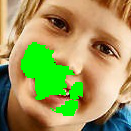

Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.0, 'Fear': 0.0, 'Joy': 100.0, 'Sad': 0.0}
1/1 [==============================] - 0s 82ms/step
Predicted ASD Label: ASD
ASD Percentage: 97.42


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2

from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Load the VGG16 model without the top classification layers
resnet50V2 = ResNet50V2(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
resnet50V2_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50Model.h5')

# Load the pre-trained ResNet50 model
base_model = ResNet50V2(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(255, activation='relu')(x)
x = Reshape((1, 1, 255))(x) # Add this line to reshape the output of GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

lime_model = Model(inputs=base_model.input, outputs=prediction)

resnet50V2_img_scaled = None
target_size = (224, 224)
# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global resnet50V2_img_scaled

    limeImg = cv2.imread(input_image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    resnet50V2_img_scaled = limeImg / 255

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    global resnet50V2_img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(resnet50V2_img_scaled[0], lime_model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Resize the explanation mask to 100x100
    mask = cv2.resize(mask, (100, 100), interpolation=cv2.INTER_NEAREST)

    # Convert the mask to the original image mode
    original_image = Image.open(input_image_path)
    original_width, original_height = original_image.size
    original_mode = original_image.mode

    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    # Display the original image with the explanation mask
    display(Image.fromarray(original_image))

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):

    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:

        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, resnet50V2)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, resnet50V2_model, resnet50V2)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)

1/1 [==============================] - 0s 57ms/step


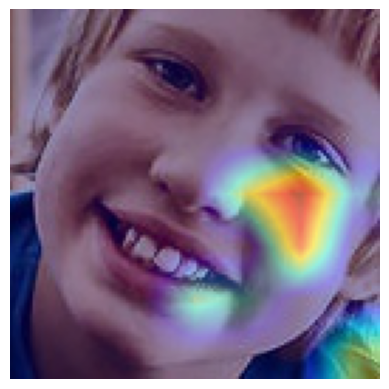

Predicted Emotion: Joy
Prediction Percentages: {'Angry': 0.0, 'Fear': 0.0, 'Joy': 100.0, 'Sad': 0.0}
1/1 [==============================] - 0s 56ms/step
Predicted ASD Label: ASD
ASD Percentage: 97.42


In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2

from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Reshape, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import time

# Load the trained model for emotion prediction
emotion_model = load_model('/Users/isurudissanayake/Desktop/FASD/ResNet50V2/emotion_model.h5')

# Load the VGG16 model without the top classification layers
resnet50V2 = ResNet50V2(weights='imagenet', include_top=False)

# Load the pre-trained VGG16 model for ASD classification
resnet50V2_model = load_model('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50Model.h5')

# Load the pre-trained ResNet50 model
base_model = ResNet50V2(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(255, activation='relu')(x)
x = Reshape((1, 1, 255))(x) # Add this line to reshape the output of GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

resnet50V2model = Model(inputs=base_model.input, outputs=prediction)

target_size = (224, 224)

resnet50V2_img_scaled = None
resnet50_grad_img_original = None
resnet50_grad_img_for_model = None
resnet50_grad_img_scaled = None

def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define a function to preprocess input image and extract features for emotion prediction
def preprocess_image(image_path, feature_extraction_model):
    global resnet50V2_img_scaled
    global resnet50_grad_img_original
    global resnet50_grad_img_for_model
    global resnet50_grad_img_scaled

    gradImg = cv2.imread(input_image_path)
    resnet50_grad_img_original = gradImg.copy()  # Save a copy for visualization later
    gradImg = cv2.resize(gradImg, target_size)
    resnet50_grad_img_for_model = preprocess_input(np.expand_dims(image.img_to_array(gradImg), axis=0))

    # Preprocess the image for the explainer by dividing pixel values by 255
    resnet50_grad_img_scaled = gradImg / 255.0

    limeImg = cv2.imread(input_image_path)
    limeImg = cv2.resize(limeImg, target_size)
    limeImg = cv2.cvtColor(limeImg, cv2.COLOR_BGR2RGB)
    limeImg = np.expand_dims(limeImg, axis=0)
    limeImg = preprocess_input(limeImg)

    resnet50V2_img_scaled = limeImg / 255

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    global resnet50_grad_img_original
    global resnet50_grad_img_for_model
    global resnet50_grad_img_scaled
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    # Visualize the Grad-CAM heatmap
    heatmap = generate_grad_cam(resnet50V2model, resnet50_grad_img_for_model, 'conv5_block3_out')

    # Resize heatmap to match the size of the original image
    heatmap = cv2.resize(heatmap, (resnet50_grad_img_original.shape[1], resnet50_grad_img_original.shape[0]))

    # Apply colormap for better visualization
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(resnet50_grad_img_original, 0.6, heatmap, 0.4, 0)

    # Display the superimposed image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return predicted_emotion, percentages

# Define a function to predict whether an image belongs to ASD or not
def predict_asd(image_path, model, feature_extraction_model):
    global resnet50V2_img_scaled


    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    if prediction > 0.5:
 

        return "ASD", round(float(prediction[0]) * 100, 2)
    else:
        return "Non-ASD", round(float(1 - prediction[0]) * 100, 2)

# Path to the input image
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0049.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, emotion_model, resnet50V2)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)

# Predict ASD of the input image
predicted_asd_label, asd_percentage = predict_asd(input_image_path, resnet50V2_model, resnet50V2)
print("Predicted ASD Label:", predicted_asd_label)
print("ASD Percentage:", asd_percentage)